In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
train_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/train" #link need to be adapted to other persons file location
test_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/test" #link need to be adapted to other persons file location
val_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/val" #link need to be adapted to other persons file location
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.is_dir()]))
print(class_names)

['Am' 'Background' 'C' 'Dm' 'Em' 'F' 'G']


In [5]:
# Rescale data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=64,
                                                                  class_mode='categorical')
test_data = test_datagen.flow_from_directory(val_dir,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical')

Found 3701 images belonging to 7 classes.
Found 3701 images belonging to 7 classes.
Found 840 images belonging to 7 classes.


In [4]:
# Create model 
model_1 = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)), # filters, kernel_size
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #pool_size=2, padding="valid"
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #2
    Flatten(),
    Dense(7, activation='softmax') # 7 is number of classes
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [5]:
# Fit the model
history_1 = model_1.fit(train_data_augmented,
                       epochs=25,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/25
58/58 [==============================] - 688s 12s/step - loss: 1.9920 - accuracy: 0.1751 - val_loss: 1.9629 - val_accuracy: 0.1595
Epoch 2/25
58/58 [==============================] - 681s 12s/step - loss: 1.8702 - accuracy: 0.1786 - val_loss: 1.9416 - val_accuracy: 0.1690
Epoch 3/25
58/58 [==============================] - 695s 12s/step - loss: 1.8488 - accuracy: 0.2048 - val_loss: 1.8649 - val_accuracy: 0.1952
Epoch 4/25
58/58 [==============================] - 703s 12s/step - loss: 1.8116 - accuracy: 0.2443 - val_loss: 1.8695 - val_accuracy: 0.2143
Epoch 5/25
58/58 [==============================] - 699s 12s/step - loss: 1.7497 - accuracy: 0.2683 - val_loss: 1.7267 - val_accuracy: 0.2667
Epoch 6/25
58/58 [==============================] - 702s 12s/step - loss: 1.7106 - accuracy: 0.3045 - val_loss: 1.7651 - val_accuracy: 0.2881
Epoch 7/25
58/58 [==============================] - 768s 13s/step - loss: 1.6604 - accuracy: 0.3340 - val_loss: 1.6910 - val_accuracy: 0.3369
Epoch 

In [6]:
# Evaluate on the test data
model_1.evaluate(test_data)

14/14 [==============================] - 39s 3s/step - loss: 0.2999 - accuracy: 0.8976


[0.29991814494132996, 0.8976190686225891]

In [7]:
# From:
# Bourke, D. (n.d.-b). 03. Convolutional Neural Networks and Computer Vision with TensorFlow:
# 5. Evaluate the model. Zero to Mastery TensorFlow for Deep Learning. Retrieved October 16, 2023, from
# https://dev.mrdbourke.com/tensorflow-deep-learning/03_convolutional_neural_networks_in_tensorflow/#5-evaluate-the-model


# Plot validation and training
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

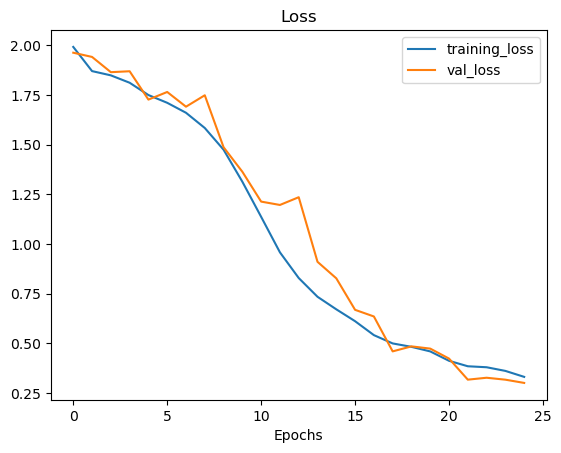

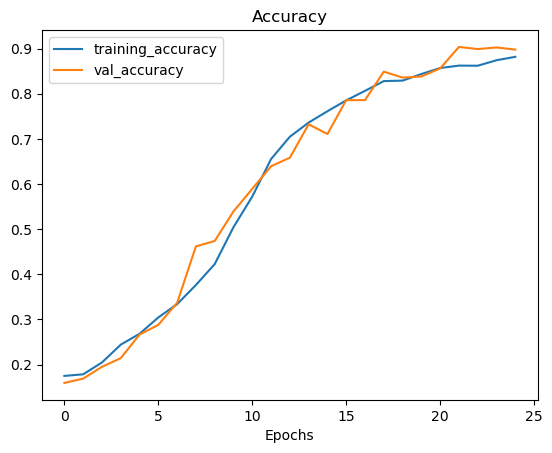

In [8]:
plot_loss_curves(history_1)

In [15]:
from keras.models import load_model

#Save the trained model to an Keras file
model_1.save("Models/model_1.keras")

#Save the trained model to SavedModel format
tf.saved_model.save(model_1, "Models/model_1")

INFO:tensorflow:Assets written to: Models/model_1\assets


INFO:tensorflow:Assets written to: Models/model_1\assets


In [16]:
tf.keras.saving.save_model(model_1,"C:/Users/alexa/Documents/Master/TestModel", save_format="keras")

INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel\assets


INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel\assets


In [17]:
tf.keras.saving.save_model(model_1,"C:/Users/alexa/Documents/Master/TestModel2", save_format="tf")

INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel2\assets


INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel2\assets


In [13]:
model_json = model_1.to_json()
with open('model_architecture.json','w') as json_file:
    json_file.write(model_json)
model_1.save_weights('model_1_weights.h5')

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [16]:
model_2 = Sequential()
model_2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model_2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(units=256, activation="relu"))
model_2.add(Dense(units=128, activation="relu"))
model_2.add(Dense(units=10, activation="softmax"))

In [19]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
               metrics=["accuracy"])

In [20]:
history_2 = model_2.fit(train_data, 
                       epochs=15,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/15
 10/116 [=>............................] - ETA: 28:31 - loss: 1.8815 - accuracy: 0.1656

KeyboardInterrupt: 

In [ ]:
# improvements:
# faster learning rate
# different model

In [3]:
from keras.models import load_model
loaded_model_1 = tf.keras.models.load_model("Models/model_1.keras")

In [6]:
yhat = loaded_model_1.predict(test_data)

14/14 [==============================] - 45s 3s/step


In [19]:
# From:
# Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., 
# Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). 
# Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

# sklearn.metrics.classification_report. (n.d.). Scikit-learn. Retrieved December 17, 2023, 
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


pred = loaded_model_1.predict(test_data, batch_size=64)
pred = np.argmax(pred, axis=-1)

y_true = test_data.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))


14/14 [==============================] - 39s 3s/step
              precision    recall  f1-score   support

          Am       0.14      0.15      0.15       130
  Background       0.10      0.10      0.10        60
           C       0.16      0.16      0.16       130
          Dm       0.14      0.15      0.14       130
          Em       0.18      0.17      0.17       130
           F       0.16      0.15      0.16       130
           G       0.12      0.12      0.12       130

    accuracy                           0.15       840
   macro avg       0.14      0.14      0.14       840
weighted avg       0.15      0.15      0.15       840



In [21]:
loaded_model_1.evaluate(test_data, batch_size=64)


14/14 [==============================] - 42s 3s/step - loss: 0.2999 - accuracy: 0.8976


[0.29991814494132996, 0.8976190686225891]

In [23]:
# From:
# sklearn.metrics.f1_score. (n.d.). Scikit-learn. Retrieved December 17, 2023,
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


f1_score(y_true, pred, average=None)

array([0.14705882, 0.1       , 0.16091954, 0.14393939, 0.17322835,
       0.15564202, 0.11904762])

In [24]:
# From:
# sklearn.metrics.precision_score. (n.d.). Scikit-learn. Retrieved December 17, 2023,
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html


precision_score(y_true, pred, average=None)

array([0.14084507, 0.1       , 0.16030534, 0.14179104, 0.17741935,
       0.15748031, 0.12295082])

In [25]:
# From:
# sklearn.metrics.recall_score. (n.d.). Scikit-learn. Retrieved December 17, 2023, 
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html 


recall_score(y_true, pred, average=None)

array([0.15384615, 0.1       , 0.16153846, 0.14615385, 0.16923077,
       0.15384615, 0.11538462])